# Loops and Parallelism

## QUICK TIP!

In [1]:
import matplotlib.pyplot as plt

In [2]:
import time

## Background

* Loops, in general, are slow and hard to read. 

* There are packages (numpy) that make computations extremely fast and efficient. Instead of performing operations on individual elements of say a vector, we instead perform operations on the *entire object* at once. 

## Base Python Example: Multiplying Vectors (element-wise)

In [3]:
def multiply_arrays(arr1,arr2):
    # initialize output array
    out = []
    
    # start stop watch
    s = time.time()
    
    # multiply each element with FOR LOOP
    for value1, value2 in zip(arr1, arr2):
        out.append(value1*value2)
    
    # end stop watch
    e = time.time()
    
    # get time difference
    dt = e-s
    
    return dt, out

# call function on 0 to 10,000,000
arr1 = [i for i in range(10000000)]
arr2 = [i for i in range(10000000)]
dt_base, out = multiply_arrays(arr1,arr2)

print(dt_base,' seconds')
print(out[0:100])

1.5719208717346191  seconds
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]


## Numpy: Parallel Computations

In [4]:
import numpy as np

def multiply(arr1,arr2):
    '''
    MUST INPUT NUMPY ARRAYS
    '''
    
    s = time.time()
    out = arr1 * arr2
    e = time.time()
    
    dt = e-s
    
    return dt, out

arr1 = np.arange(0,10000000)
arr2 = np.arange(0,10000000)

dt_numpy, out = multiply(arr1,arr2)

print(dt_numpy,' seconds')
print(out[0:100])


0.04956984519958496  seconds
[   0    1    4    9   16   25   36   49   64   81  100  121  144  169
  196  225  256  289  324  361  400  441  484  529  576  625  676  729
  784  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681
 1764 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025
 3136 3249 3364 3481 3600 3721 3844 3969 4096 4225 4356 4489 4624 4761
 4900 5041 5184 5329 5476 5625 5776 5929 6084 6241 6400 6561 6724 6889
 7056 7225 7396 7569 7744 7921 8100 8281 8464 8649 8836 9025 9216 9409
 9604 9801]


In [5]:
print(f'Numpy is {dt_base/dt_numpy} times as fast!')

Numpy is 31.711232209935982 times as fast!


## If you find yourself using a loop, numpy probably has a function!

## A more practical example...applying a mask to data!

Imagine you have a spectrum (flux vs. wavelength) from a source, and you know some parts of the data are unreliable (for whatever reason) and you want to set those values to 0.

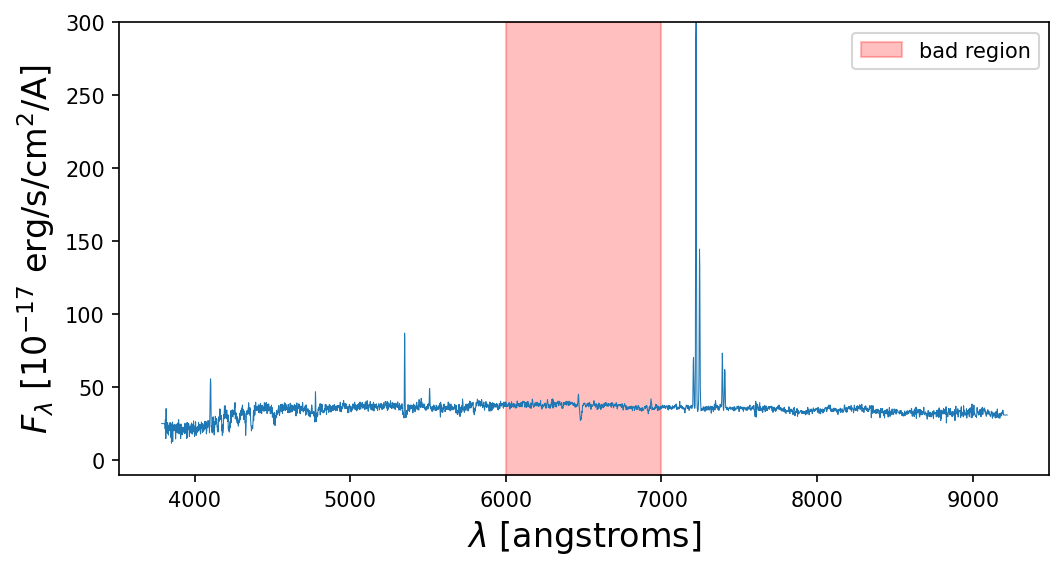

In [6]:
from astropy.io import fits 
import matplotlib.pyplot as plt

def get_spectrum_and_wavelengths(file):
    '''
    this code chunk reads data from a fits file
    '''
    with fits.open(file) as f:
        lam = 10**(f[0].header['COEFF0'] + f[0].header['COEFF1']*np.arange(0,3864))
        spec = f[0].data[0]
    
    return lam, spec

lam, spec = get_spectrum_and_wavelengths('spSpec-51788-0401-161.fit')

# plot 
plt.figure(figsize=(8,4),dpi=150)
plt.fill_between(x=[6000,7000],y1=-10,y2=300,color='red',alpha=0.25,label='bad region')
plt.plot(lam,spec,lw=0.5)
plt.xlabel('$\\lambda$ [angstroms]',fontsize=16)
plt.ylabel('$F_\\lambda$ [10$^{-17}$ erg/s/cm$^2$/A]',fontsize=16)
plt.ylim(-10,300)
plt.legend()
plt.show()

In [7]:
# instead of iterating through wavelengths, checking with some if/else statements, and reassigning,
# use np.where()
is_bad = np.where((lam > 6000) & (lam < 7000))

# define the mask
mask = np.ones(len(spec))
mask[is_bad] = False

# test speeds
dt_slow, good_spectrum_slow = multiply_arrays(spec,mask)
dt_fast, good_spectrum_fast = multiply(spec,mask)

In [8]:
print(dt_slow)
print(dt_fast)
print(dt_slow/dt_fast)

0.012584209442138672
0.0001308917999267578
96.14207650273224


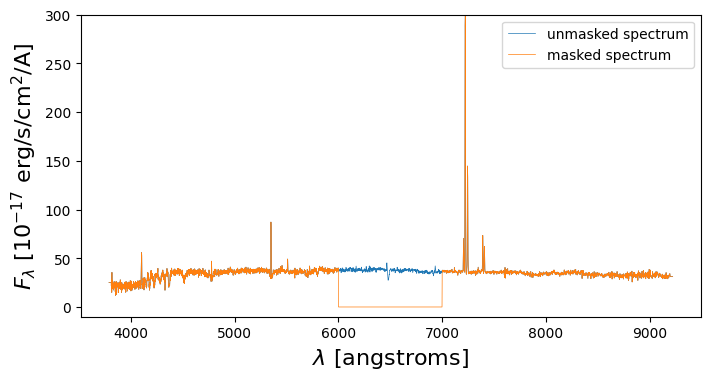

In [9]:
# here 
plt.figure(figsize=(8,4),dpi=100)
plt.plot(lam,spec,lw=0.5,label='unmasked spectrum')
plt.plot(lam,good_spectrum_fast,lw=0.5,label='masked spectrum')
plt.xlabel('$\\lambda$ [angstroms]',fontsize=16)
plt.ylabel('$F_\\lambda$ [10$^{-17}$ erg/s/cm$^2$/A]',fontsize=16)
plt.ylim(-10,300)
plt.legend()
plt.show()